# Regression

## Seoul Artificial Intelligence Meetup

Martin Kersner, <m.kersner@gmail.com>

2017/10/14

## What is regression?

**Classification** - targets are nominal values.

**Regression** - targets are numeric and continuous.

target = label

regression weights

linear regression vs non-linear regression

linear regression is function of inputs multiplied together

linear relationship

$y = 1*w_0 + x_1*x_1 + x_2*x_2 + ... + x_n*x_n$

$x_0 = 1$ represents constant offset

$y$ target

$X$ features

$w$ weight matrix

$y_i = X_{i}^{T}w$

find $w$ that minimizes error

define error as difference between predicted $y$ and the actual $y$

$\sum_{i=1}^{m}(y_i - x_i^{T}w)^2$

$(y-Xw)^{T}(y-Xw)$

$X^{T}(y-Xw)$

$\hat{w} = (X^{T}X)^{-1}X^{-T}y$

## Matrix inverse

Requires to compute **INVERSE MATRIX**.

Matrix inverse may not exist.
Need to check before.

## Ordinary least squares

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [62]:
X = np.matrix([[1, 1], [1,2], [1,3], [1,4], [1,5]])
y = np.matrix([[0], [3], [2], [4.5], [8]])

In [20]:
from sklearn.datasets import load_boston

In [21]:
boston = load_boston()

In [24]:
boston.data.shape

(506, 13)

In [25]:
boston.target.shape

(506,)

In [49]:
# boston.data[:,0]

In [52]:
# modified example from book Machine Learning in Action ()
import numpy as np

def ols(X, y):
    xTx = X.T * X
    
    # check determinate
    if np.linalg.det(xTx) == 0.0:
        return None # matrix is singular
    else:
        return xTx.I * (X.T * y)

In [68]:
ws = ols(X, y)

In [83]:
def run_ols(X, y):
    ws = ols(X, y)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(X[:,1], y, 'ro')

    xcopy = X.copy()
    xcopy.sort(0)
    yHat = xcopy*ws
    ax.plot(xcopy[:, 1], yHat)
    plt.show()
    
    print(np.corrcoef(np.transpose(y), np.transpose(X*ws)))

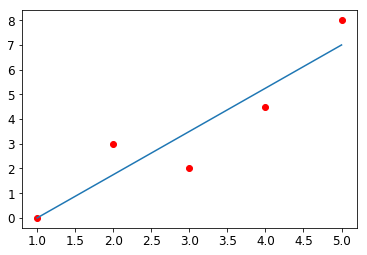

[[ 1.          0.92233098]
 [ 0.92233098  1.        ]]


In [84]:
run_ols(X, y)

## Evaluation of regression

* Correlation
* XXX

### Correlation

np.corrcoef()

In [80]:
np.corrcoef(np.transpose(y), np.transpose(X*ws))

array([[ 1.        ,  0.92233098],
       [ 0.92233098,  1.        ]])

### Locally weighted linear regression

$\hat{w} = (X^{T}WX)^{-1}X^{T}Wy$

$W$ matrix for weighing data points

$w(i,i) = exp(\frac{|x^{i}-x|}{-2k^2})$

In [93]:
def lwlr(test_point, X, y, k=1.0):
    m = X.shape[0]
    W = np.eye((m))
    
    for j in range(m):
        diff_mat = test_point - X[j,:]
        W[j,j] = np.exp(diff_mat*diff_mat.T/(-2.0*k**2))

    xtx = X.T * (W * X)
    
    if np.linalg.det(xtx) == 0.0:
        return None # matrix is singular
    else:
        ws = xtx.I * (X.T * (W * y))
        return test_point * ws

def lwlr_test(test_arr, X, y, k=1.0):
    m = test_arr.shape[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = lwlr(test_arr[i], X, y, k)
    
    return y_hat

In [95]:
y_hat = lwlr_test(X, X, y, 1.0)

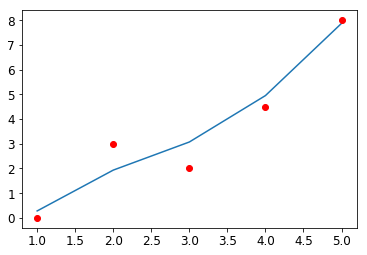

In [99]:
srt_idx = X[:, 1].argsort(0)
x_sort = X[srt_idx][:, 0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_sort[:, 1], y_hat[srt_idx])
ax.plot(X[:,1], y, 'ro')

## Shrinkage methods

If more features ($x$)than data points ($m$), we cannot compute $(X^{T}X)^{-1}$.

Then, data matrix isn't full rank.

### Ridge regression



### Lasso

### Forward Stagewise regression